# Determine Movie Genre by Neighboring Movies

Using the k-nearest neighbors method, use the top-k most similar movies to a target film to predict the target movie's genre.

Use Jaccard similarity based on actors in each movie to rank movies and select the top-k most similar movies.

In [11]:
import json

import pandas as pd
import numpy as np

from scipy.sparse import lil_matrix

import matplotlib.pyplot as plt


# Exercise 1. Predicting Movie Genre using Decision Trees:

Download the scaffolding code: Week 11 Exercise-Scaffolding.ipynb Download Week 11 Exercise-Scaffolding.ipynb

Split your data into an 80/20 train/test split.

Use the decision tree classifier from SciKit-learn Links to an external site. to classify movie genres in your test set for different values of `max_depth`.

Initialize the DecisionTreeClassifier() with different values of `max_depth`, starting at 1 and going to 10.

For each value for depth, evaluate accuracy of the trained model on both your training set and your test set, where a prediction is correct if the predicted genre exists in the actual set of genres for a film

What is the relationship between max depth and accuracy?

Max Depth: 1
Training Accuracy: 0.27
Test Accuracy: 0.27
Difference: -0.01

Max Depth: 2
Training Accuracy: 0.30
Test Accuracy: 0.30
Difference: -0.01

Max Depth: 3
Training Accuracy: 0.32
Test Accuracy: 0.32
Difference: 0.00

Max Depth: 4
Training Accuracy: 0.33
Test Accuracy: 0.33
Difference: 0.00

Max Depth: 5
Training Accuracy: 0.34
Test Accuracy: 0.33
Difference: 0.00

Max Depth: 6
Training Accuracy: 0.35
Test Accuracy: 0.34
Difference: 0.01

Max Depth: 7
Training Accuracy: 0.36
Test Accuracy: 0.33
Difference: 0.03

Max Depth: 8
Training Accuracy: 0.38
Test Accuracy: 0.33
Difference: 0.06

Max Depth: 9
Training Accuracy: 0.40
Test Accuracy: 0.33
Difference: 0.07

Max Depth: 10
Training Accuracy: 0.43
Test Accuracy: 0.32
Difference: 0.11



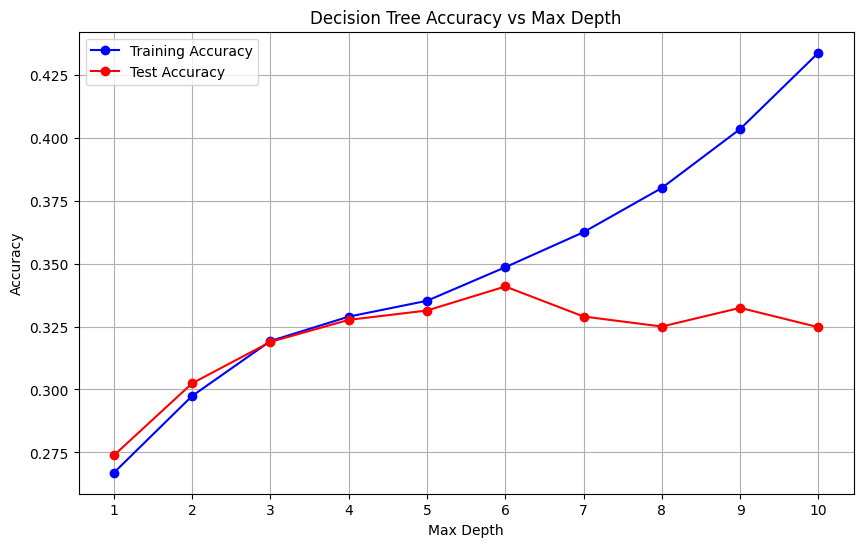


Best performance:
Max Depth: 6
Test Accuracy: 0.3409

Overfitting Analysis:
Depth 1: Overfitting gap = -0.007
Depth 2: Overfitting gap = -0.005
Depth 3: Overfitting gap = 0.000
Depth 4: Overfitting gap = 0.001
Depth 5: Overfitting gap = 0.004
Depth 6: Overfitting gap = 0.008
Depth 7: Overfitting gap = 0.034
Depth 8: Overfitting gap = 0.055
Depth 9: Overfitting gap = 0.071
Depth 10: Overfitting gap = 0.109


In [ ]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


data = []
with open('imdb_movies_2000to2022.prolific.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))


df = pd.DataFrame(data)

# need genres or ratings or won't be utilized (must not be empty or less than zero count)
df = df[df['genres'].notna() & df['genres'].apply(lambda x: len(x) > 0)]
df = df[df['rating'].notna()]
df = df[df['rating'].apply(lambda x: isinstance(x, dict) and 'avg' in x)]

# features used and target for features to measure
df['rating_avg'] = df['rating'].apply(lambda x: x['avg'] if isinstance(x, dict) else None)
df['rating_votes'] = df['rating'].apply(lambda x: x['votes'] if isinstance(x, dict) and 'votes' in x else 0)


df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# numeric features only for simplicity
features = ['rating_avg', 'rating_votes', 'runtime']
X = df[features].fillna(0)  # Fill missing values with 0

# Prepare target (genres)
# Since movies can have multiple genres, we'll predict the first genre as a simplified approach
df['primary_genre'] = df['genres'].apply(lambda x: x[0] if x else 'Unknown')

# Encode the target labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['primary_genre'])

# train/test split 80/20
input_train, input_test, output_train, output_test = train_test_split(X, y, test_size=0.2)

# lists to store results
train_accuracies = []
test_accuracies = []
depths = range(1, 11)

# training models with different depth values
for depth in depths:
    # Initialize and train the decision tree classifier
    classifier = DecisionTreeClassifier(max_depth=depth)
    classifier.fit(input_train, output_train)
    
    # prediction using training and test sets
    output_train_pred = classifier.predict(input_train)
    output_test_pred = classifier.predict(input_test)
    
    # accuracy scores
    train_accuracy = accuracy_score(output_train, output_train_pred)
    test_accuracy = accuracy_score(output_test, output_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f"Max Depth: {depth}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Difference: {train_accuracy - test_accuracy:.2f}")
    print()

# plot for results 
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, 'bo-', label='Training Accuracy') # blue dotted line, label for legend 
plt.plot(depths, test_accuracies, 'ro-', label='Test Accuracy') # red dotted line, label for legend
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()

# Find the best test accuracy
best_test_idx = np.argmax(test_accuracies)
best_depth = depths[best_test_idx]
best_accuracy = test_accuracies[best_test_idx]

print(f"\nBest performance:")
print(f"Max Depth: {best_depth}")
print(f"Test Accuracy: {best_accuracy:.4f}")

# overfitting check
print(f"\nOverfitting Analysis:")
for elem, depth in enumerate(depths):
    overfitting_gap = train_accuracies[elem] - test_accuracies[elem]
    print(f"Depth {depth}: Overfitting gap = {overfitting_gap:.3f}")
    
# The more max depth you have, the greater the model's accuracy prediction (relationship).

# Exercise 2 (Extra Practice):

Predicting Movie Genre Based on scikit-learn's k Nearest Neighbors

Download the scaffolding code: Week 11 Exercise-Scaffolding.ipynb Download Week 11 Exercise-Scaffolding.ipynb

Split your data into an 80/20 train/test split.

Use the kNN classifier from SciKit-learn Links to an external site. to classify movie genres in your test set for different values of k.

Initialize the KNeighborsClassifier() with different values of `n_neighbors`, starting at 1 and going to 10.

For each k value, evaluate accuracy of the trained model on both your training set and your test set, where a prediction is correct if the predicted genre exists in the actual set of genres for a film

What is the relationship between k and accuracy?